### Bayesian optimization

$ \mu_{t+1}= k(x)^{T}K^{-1}f_{1:t}$

$ \sigma_{t+1}= k(x_{t+1},x_{t+1})-k^{T}K^{-1}k$

my_kernel is as follows.

$k(x_n,x_m)=\theta_{0}exo(-\theta_1*0.5*(x_n-x_m^{2}))$

There are three type of acquisitioin functions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline


In [2]:
a=np.array([])
np.append(a,4)
b = np.array([1,2,3])



In [3]:
#### kernel
def my_kernel(x_n,x_m,a_1=200.0,a_2=0.1,a_3=1.0,a_4=10.0):
    return a_1*np.exp(-a_2*0.5*np.dot(x_n-x_m,x_n-x_m))
#### kernel
#def my_kernel(x_n,x_m,a_1=20.0,a_2=0.2,a_3=1.0,a_4=4.0):
###    return a_1*np.exp(-a_2*0.5*np.dot(x_n-x_m,x_n-x_m))+a_3+a_4*np.dot(x_n-x_m,x_n-x_m)
    

def pred(_x,_y,newpoint):
    ### gram matrix
    aaa=np.array([my_kernel(i,j) for i in _x for j in _x])
    K = aaa.reshape([np.shape(_x)[0],np.shape(_x)[0]])
    aux = np.array([my_kernel(i,newpoint) for i in _x])
    mu = np.dot(aux,np.dot(np.linalg.inv(K),_y))
    vari = my_kernel(newpoint,newpoint)-np.dot(aux,np.dot(np.linalg.inv(K+np.identity(len(_x))),aux))
    return (mu,vari)


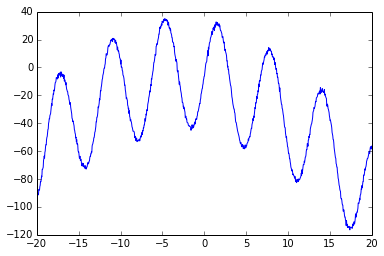

In [78]:
def generate_sample(x):
    return 40.0*np.sin(x/1.0)-np.power(0.3*(x+6.0),2)-np.power(0.2*(x-4.0),2)-1.0*np.abs(x+2.0)+np.random.normal(0,1,1)

x_ziku = np.linspace(-20,20,1000)
z_ziku = map(generate_sample,x_ziku)
plt.plot(x_ziku, z_ziku)
plt.show()

def lowerbound(mean,vari,k=1.0):
    lower_bound1 = np.array(mean)- k*np.array(variance)

def maximum(x):
    return max(xrange(np.shape(x)[0]), key=lambda i:x[i])

def aqui(mean,vari,qqq):
    lamb = (mean - qqq)/(vari*1.0)
    z = np.array([(mean[i] - qqq)*norm.cdf(lamb[i]) + vari[i]*norm.pdf(lamb[i]) for i in range(len(lamb))])
    return z

In [5]:
x_array = np.array([])
y_array = np.array([])
x_point = 5.0

plt.figure(figsize=(20, 20))
epoch=10
for i in range(epoch):
    if x_point not in x_array:
        x_array = np.append(x_array,x_point)
        #x_array = np.unique(x_array)
        print "x_point"
        print x_point
        y_point = generate_sample(x_point)
        print y_point
        y_array = np.append(y_array,y_point)
        #y_array = np.unique(y_array)
    ###print x_array
    mean_point = np.array([ pred(x_array,y_array,j)[0] for j in x_ziku])
    variance_point = np.array([ pred(x_array,y_array,j)[1] for j in x_ziku]) 
    '''
    #### lower
    lower_bound1 = lowerbound(mean_point,variance_point)
    ddd = maximum(lower_bound1)
    x_point = x_ziku[ddd] #### next point
    '''
    #### accui
    qqq = max(y_array)
    accui = aqui(mean_point,variance_point,qqq)
    x_point = x_ziku[maximum(accui)]+np.random.normal(0,0.01,1)
    print "x_point2"
    print x_point
    print generate_sample(x_point)
    if(i%1==0):
        plt.subplot(epoch,2,i*2+1)
        plt.plot(x_ziku,np.array(mean_point),color="red",label="mean")
        plt.plot(x_ziku,z_ziku,color="yellow")
        high_bound = mean_point+ 1.0*variance_point
        lower_bound = mean_point- 1.0*variance_point
        print len(high_bound)
        plt.fill_between(x_ziku,high_bound,lower_bound,color="green",label="confidence")
        plt.xlim(-20,20)
        plt.ylim(-100,100)
        plt.scatter(x_array,y_array)
        plt.subplot(epoch,2,i*2+2)
        plt.plot(x_ziku,accui)
plt.savefig("bayes1.png")
plt.show()

###plt.show()
print "finish"

x_point
5.0


NameError: name 'generate_sample' is not defined

RuntimeError: Error writing to file

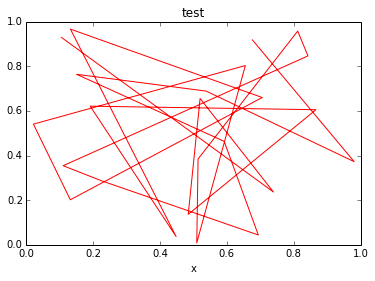

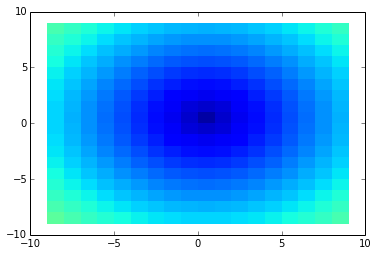

In [8]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('lines.mp4', writer=writer)

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
im_ani.save('im.gif', writer=writer)